In [ ]:
import os
import platform
import time


try:
    from IPython.display import clear_output

    JUPYTER_ENV = True
except ImportError:

    JUPYTER_ENV = False

def clear_terminal():
    """
    Clears the terminal screen or the output of a Jupyter cell.

    This function checks the environment and uses the appropriate
    command to clear the output.
    """
    # For Jupyter Notebooks (.ipynb)
    if JUPYTER_ENV:
        # The wait=True argument is important to prevent flickering
        clear_output(wait=True)
    # For standard terminals
    else:
        # For Windows
        if platform.system() == "Windows":
            os.system('cls')
        # For macOS and Linux
        else:
            os.system('clear')

# --- Example Usage ---
if __name__ == "__main__":
    print("Hello! This text will be cleared in 3 seconds.")
    time.sleep(3)

    # Call the function to clear the screen or cell output
    clear_terminal()

    print("The output has been cleared!")
    time.sleep(2)


The output has been cleared!


In [ ]:
!pip install zeep
!pip install sunpy
!pip install drms
!pip install sunpy[all]
!pip install reproject mpl-animators
time.sleep(3)
clear_terminal()
print("The output has been cleared!")
time.sleep(2)

The output has been cleared!


In [ ]:
from sunpy.net import Fido, attrs as a
from sunpy.map import Map
from astropy.coordinates import SkyCoord
from astropy.time import Time
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.units as u
from sunpy.net import Fido, attrs as a

In [ ]:
fecha =  '2024-08-08'
fecha_loc = '2024.08.08'
time_a = fecha +'T14:56'
time_b =  fecha +'T14:57'
def download_images(time_i,time_f,instrument_string,physobsBool=True,physobs_string="LOS_magnetic_field",amstrongVal=171):
  time_range = a.Time(time_i,time_f)
  instrument = a.Instrument(instrument_string)
  wavelength = a.Wavelength(amstrongVal*u.angstrom)
  if physobsBool == True:
    physobs = a.Physobs(physobs_string)
    results = Fido.search(time_range, instrument,physobs, wavelength)
  else:
    results = Fido.search(time_range, instrument)


  downloaded_files = Fido.fetch(results)
  print(downloaded_files)
  return results

In [ ]:
#Download main images
results = download_images(time_a,time_b,'AIA')

Files Downloaded: 0file [00:00, ?file/s]

[]


In [ ]:
#Download magnetic field images
results_mag = download_images(time_a,time_b,"HMI",physobsBool=True,amstrongVal=6173)

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

hmi.m_45s.2024.08.08_14_57_45_TAI.magnetogram.fits:   0%|          | 0.00/16.2M [00:00<?, ?B/s]

['/root/sunpy/data/hmi.m_45s.2024.08.08_14_57_00_TAI.magnetogram.fits', '/root/sunpy/data/hmi.m_45s.2024.08.08_14_57_45_TAI.magnetogram.fits']


In [ ]:

# Definimos el rango de tiempo
time_range = a.Time(time_a,time_b)

# Búsqueda de imagen ultravioleta del AIA
aia = Fido.search(
    time_range,
    a.Instrument("AIA"),
    a.Wavelength(171*u.angstrom)
)

# Búsqueda de magnetograma del HMI
hmi = Fido.search(
    time_range,
    a.Instrument("HMI"),
    a.Physobs("LOS_magnetic_field"),
    a.Wavelength(6173*u.angstrom)
)
# Descargamos los datos encontrados
aia_download = Fido.fetch(aia)
hmi_download = Fido.fetch(hmi)




Files Downloaded:   0%|          | 0/5 [00:00<?, ?file/s]

aia.lev1.171A_2024_08_08T14_56_21.35Z.image_lev1.fits:   0%|          | 0.00/12.3M [00:00<?, ?B/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7b19ef716de0>
Traceback (most recent call last):
  File "/usr/lib/python3.11/asyncio/base_events.py", line 695, in __del__
    self.close()
  File "/usr/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/usr/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/usr/lib/python3.11/signal.py", line 58, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


aia.lev1.171A_2024_08_08T14_56_33.34Z.image_lev1.fits:   0%|          | 0.00/12.3M [00:00<?, ?B/s]

aia.lev1.171A_2024_08_08T14_56_09.35Z.image_lev1.fits:   0%|          | 0.00/12.3M [00:00<?, ?B/s]

aia.lev1.171A_2024_08_08T14_56_57.35Z.image_lev1.fits:   0%|          | 0.00/12.3M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

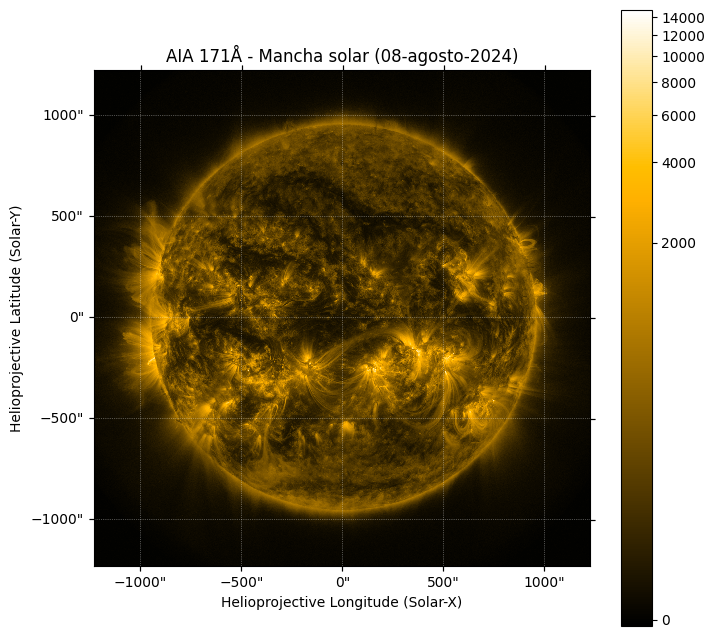

In [ ]:
# Cargamos y graficamos la imagen AIA
aia_map = Map(aia_download[0])
plt.figure(figsize=(8, 8))
aia_map.plot(cmap='sdoaia171')
plt.title("AIA 171Å - Mancha solar (08-agosto-2024)")
plt.colorbar()
plt.show()


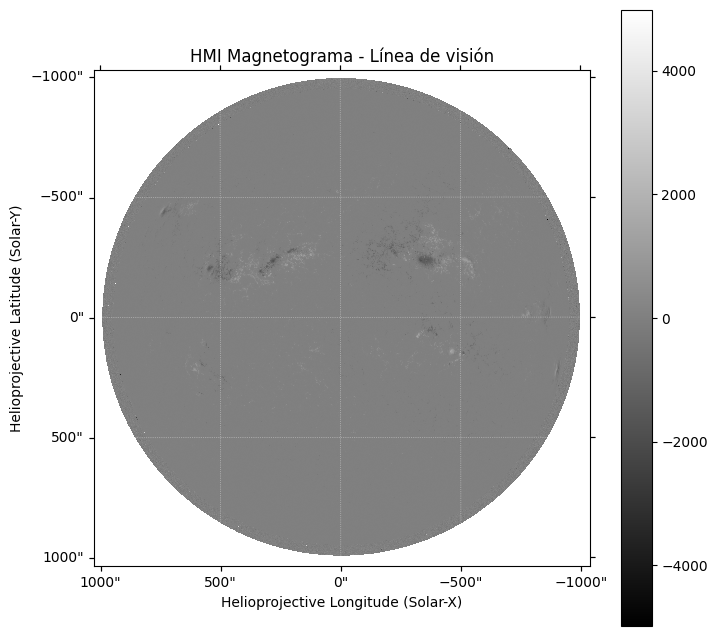

In [ ]:
# Cargamos y graficamos el magnetograma
hmi_map = Map(hmi_download[0])

plt.figure(figsize=(8, 8))
hmi_map.plot(cmap='gray')
plt.title("HMI Magnetograma - Línea de visión")
plt.colorbar()
plt.show()


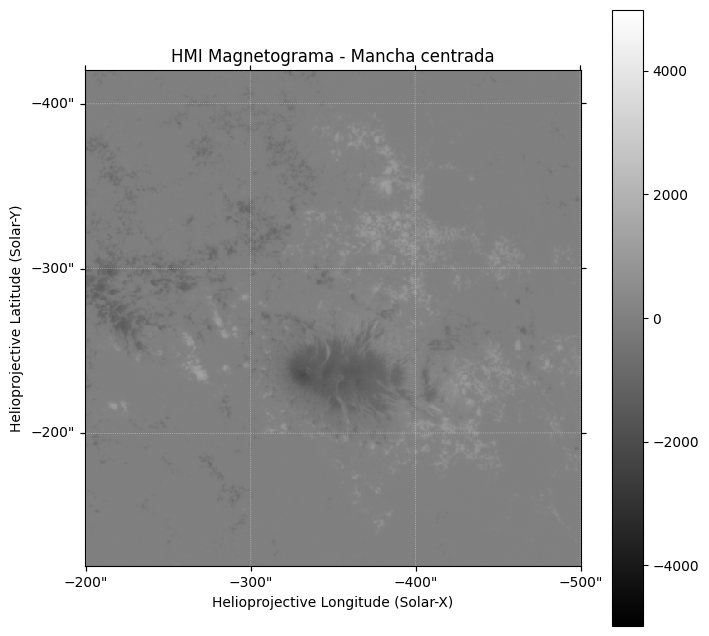

In [ ]:
coordsx = -500
coordsy =  -420
recorte = 300
# Coordenadas estimadas centradas en la mancha más grande
mancha_coord = SkyCoord(coordsx * u.arcsec, coordsy * u.arcsec, frame=hmi_map.coordinate_frame)

# Tamaño del recorte
tamano_recorte = [recorte * u.arcsec, recorte * u.arcsec]

# Hacer el recorte centrado en la mancha
hmi_cut = hmi_map.submap(mancha_coord, width=tamano_recorte[0], height=tamano_recorte[1])

# Visualizar
plt.figure(figsize=(8, 8))
hmi_cut.plot(cmap='gray')
plt.title("HMI Magnetograma - Mancha centrada")
plt.colorbar()
plt.show()





In [ ]:
print(hmi_download)

['/root/sunpy/data/hmi.m_45s.2024.08.08_14_57_00_TAI.magnetogram.fits', '/root/sunpy/data/hmi.m_45s.2024.08.08_14_57_45_TAI.magnetogram.fits']


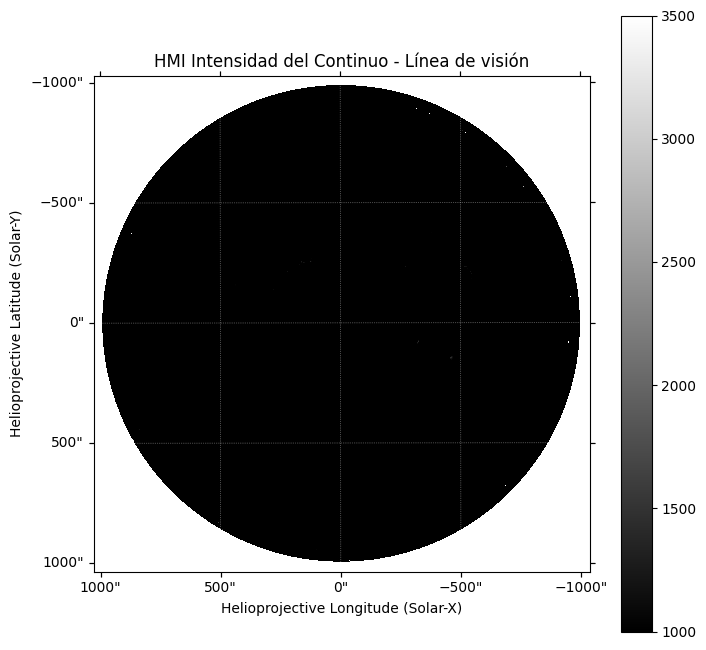

In [ ]:
from sunpy.map import Map
import matplotlib.pyplot as plt

# Cargar el mapa de intensidad del continuo (intensitygram)
# Asegúrate de que `hmi_download` tenga el archivo correcto en la posición 1 o búscalo por nombre
continuum_map = Map(hmi_download[1])  # ajusta el índice si es necesario

# Visualizar
plt.figure(figsize=(8, 8))
continuum_map.plot(cmap='gray', norm=plt.Normalize(vmin=1000, vmax=3500))
plt.title("HMI Intensidad del Continuo - Línea de visión")
plt.colorbar()
plt.show()


In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u

mancha_coord = SkyCoord(coordsx * u.arcsec, coordsy * u.arcsec, frame=continuum_map.coordinate_frame)
tamano_recorte = [recorte * u.arcsec, recorte * u.arcsec]


In [ ]:
continuum_cut = continuum_map.submap(mancha_coord,
                                     width=tamano_recorte[0],
                                     height=tamano_recorte[1])


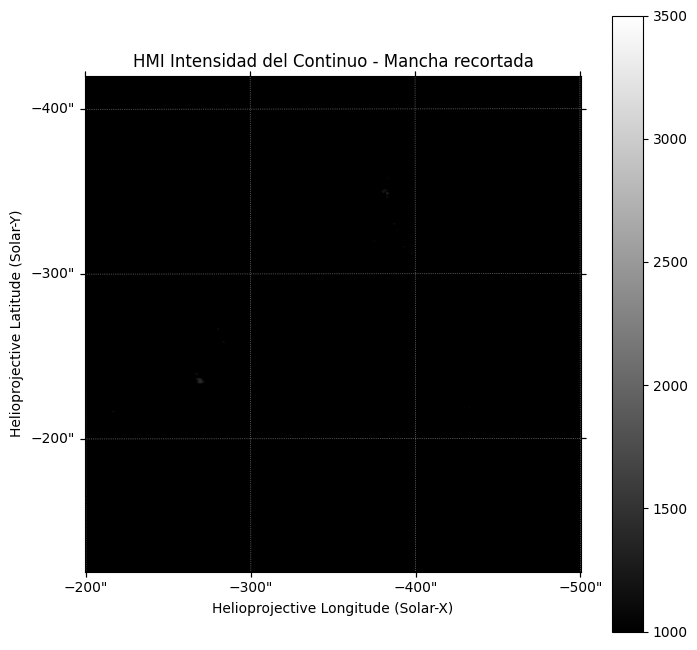

In [ ]:
plt.figure(figsize=(8, 8))
continuum_cut.plot(cmap='gray', norm=plt.Normalize(vmin=1000, vmax=3500))
plt.title("HMI Intensidad del Continuo - Mancha recortada")
plt.colorbar()
plt.show()


In [ ]:
downloaded_files = Fido.fetch(results)

Files Downloaded:   0%|          | 0/3 [00:00<?, ?file/s]

In [ ]:
from sunpy.net import Fido, attrs as a
from astropy import units as u
from astropy.time import Time

# Buscar datos de intensidad del continuo (continuum)
time_range = a.Time(time_a, fecha + 'T14:58')
instrument = a.Instrument.hmi
physobs = a.Physobs.intensity
wavelength = a.Wavelength(6173 * u.AA, 6173 * u.AA)

# Búsqueda
results = Fido.search(time_range, instrument, physobs, wavelength)

# Descarga (usa fetch en lugar de download en sunpy >= 5.1)
downloaded_files = Fido.fetch(results)


Exception ignored in: <function BaseEventLoop.__del__ at 0x7b19ef716de0>
Traceback (most recent call last):
  File "/usr/lib/python3.11/asyncio/base_events.py", line 695, in __del__
    self.close()
  File "/usr/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/usr/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/usr/lib/python3.11/signal.py", line 58, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


Files Downloaded:   0%|          | 0/3 [00:00<?, ?file/s]

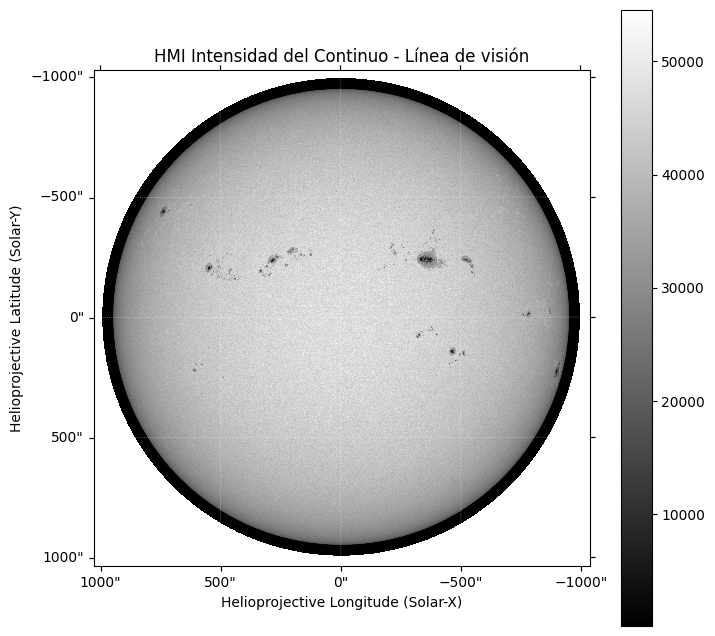

In [ ]:


continuum_map = Map(downloaded_files[0])

plt.figure(figsize=(8,8))
continuum_map.plot(cmap='gray')
plt.title("HMI Intensidad del Continuo - Línea de visión")
plt.colorbar()
plt.show()


In [ ]:
print(hmi_download)




['/root/sunpy/data/hmi.m_45s.2024.08.08_14_57_00_TAI.magnetogram.fits', '/root/sunpy/data/hmi.m_45s.2024.08.08_14_57_45_TAI.magnetogram.fits']


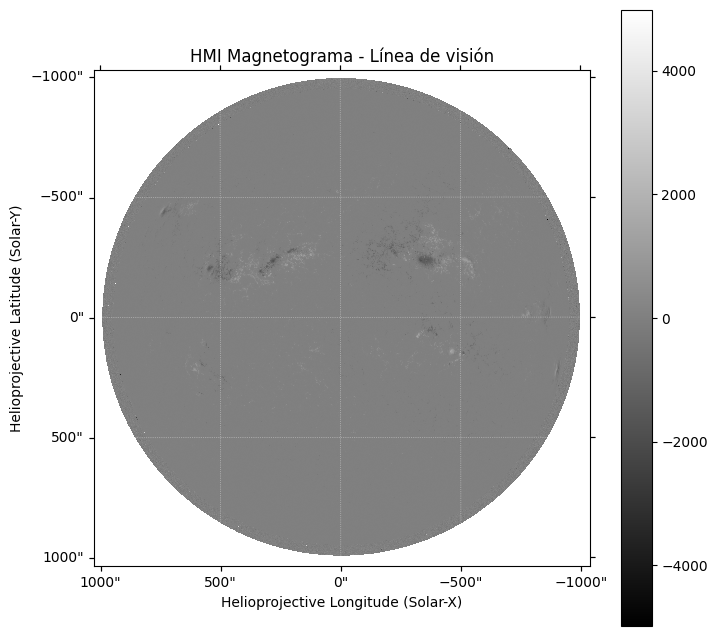

In [ ]:
fecha_loc = '2024.08.08'
# Cargar el segundo archivo (el magnetograma)
magnetograma_map = Map('/root/sunpy/data/hmi.m_45s.'+fecha_loc+'_14_57_00_TAI.magnetogram.fits')

# Graficar
plt.figure(figsize=(8,8))
magnetograma_map.plot(cmap='gray')
plt.title("HMI Magnetograma - Línea de visión")
plt.colorbar()
plt.show()



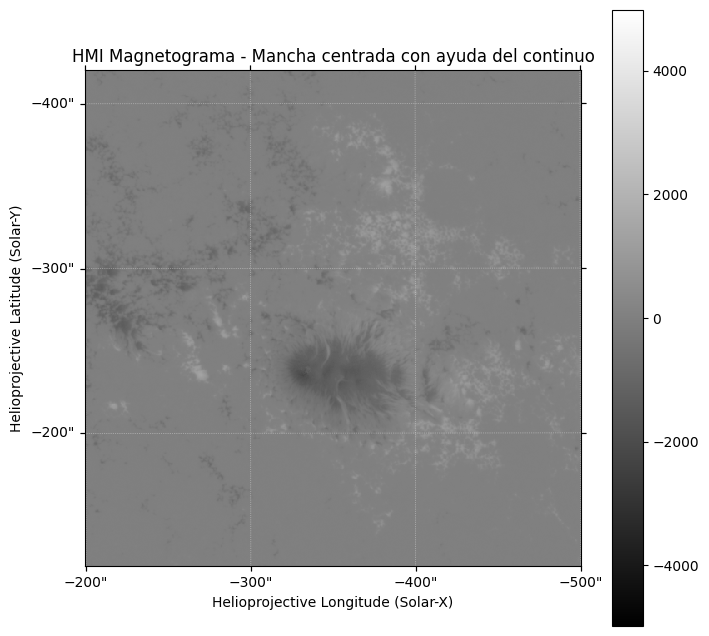

In [ ]:
coordsx = -500
coordsy =  -420
recorte = 300
# Coordenadas estimadas de la mancha más grande (tomadas del continuo)
mancha_coord = SkyCoord(coordsx * u.arcsec, coordsy * u.arcsec, frame=magnetograma_map.coordinate_frame)

# Tamaño del recorte (ajústalo si quieres más o menos área)
tamano_recorte = [recorte * u.arcsec, recorte * u.arcsec]

# Recortar el magnetograma usando esas coordenadas
magnetograma_cut = magnetograma_map.submap(mancha_coord, width=tamano_recorte[0], height=tamano_recorte[1])

# Visualizar
plt.figure(figsize=(8, 8))
magnetograma_cut.plot(cmap='gray')
plt.title("HMI Magnetograma - Mancha centrada con ayuda del continuo")
plt.colorbar()
plt.show()


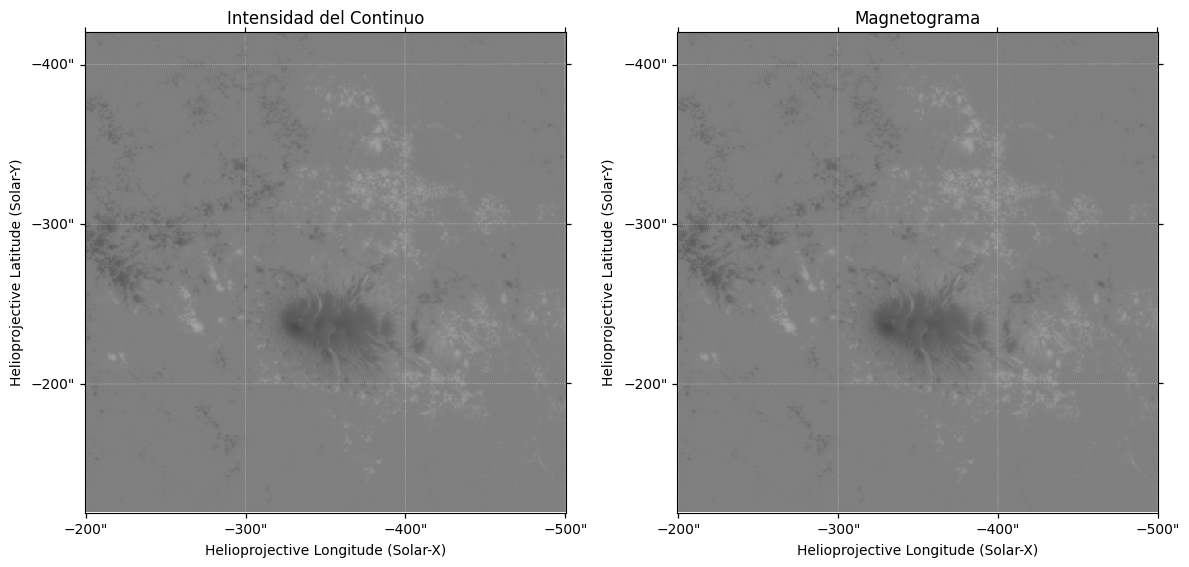

In [ ]:


# Crear figura con 2 ejes, cada uno con la proyección del mapa correspondiente
fig = plt.figure(figsize=(12, 6))

# Primer eje: intensidad del continuo
ax1 = fig.add_subplot(1, 2, 1, projection=continuum_cut.wcs)
continuum_cut.plot(axes=ax1, cmap='gray')
ax1.set_title("Intensidad del Continuo")

# Segundo eje: magnetograma
ax2 = fig.add_subplot(1, 2, 2, projection=magnetograma_cut.wcs)
magnetograma_cut.plot(axes=ax2, cmap='gray')
ax2.set_title("Magnetograma")

plt.tight_layout()
plt.show()



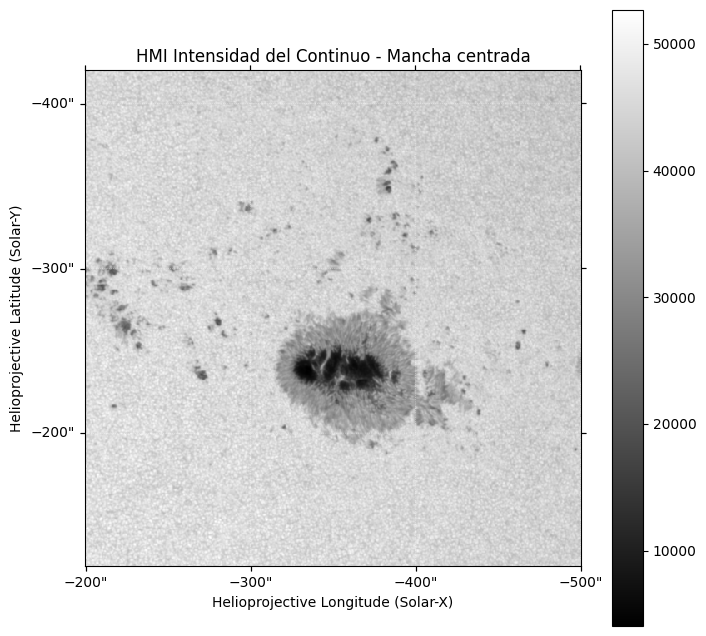

In [ ]:


# Coordenadas centradas en la mancha (mismas que en el magnetograma)
mancha_coord = SkyCoord(coordsx * u.arcsec, coordsy * u.arcsec, frame=continuum_map.coordinate_frame)

# Tamaño del recorte
tamano_recorte = [recorte * u.arcsec, recorte * u.arcsec]

# Recorte en el mapa de intensidad del continuo
continuum_cut = continuum_map.submap(mancha_coord, width=tamano_recorte[0], height=tamano_recorte[1])

# Visualizar
plt.figure(figsize=(8, 8))
continuum_cut.plot(cmap='gray')
plt.title("HMI Intensidad del Continuo - Mancha centrada")
plt.colorbar()
plt.show()


In [ ]:
import numpy as np

# Datos de intensidad del recorte del continuo
data = continuum_cut.data

# Definir umbral de intensidad: pixeles por debajo del 60% del máximo
umbral = 0.6 * np.max(data)

# Máscara: 1 donde hay mancha, 0 donde no
mascara_mancha = data < umbral

# Calcular área proyectada: cada píxel tiene un área angular conocida
pix_area_arcsec2 = np.abs(continuum_cut.scale[0].value * continuum_cut.scale[1].value)
area_total_arcsec2 = np.sum(mascara_mancha) * pix_area_arcsec2

# Opcional: convertir a Mm² (Megámetros cuadrados)
arcsec_to_Mm = 0.725  # 1 arcsec ≈ 0.725 Mm en el Sol
area_total_Mm2 = area_total_arcsec2 * arcsec_to_Mm**2

print(f"Área de la mancha solar: {area_total_arcsec2:.2f} arcsec²")
print(f"Área de la mancha solar: {area_total_Mm2:.2f} Mm²")


Área de la mancha solar: 3128.79 arcsec²
Área de la mancha solar: 1644.57 Mm²


In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

# Coordenadas de todos los píxeles en el mapa recortado
yy, xx = np.indices(continuum_cut.data.shape)
coords = continuum_cut.pixel_to_world(xx * u.pixel, yy * u.pixel)

# Extraer solo las coordenadas de los píxeles oscuros (mancha)
coords_mancha = coords[mascara_mancha]

# Calcular el centroide (promedio de coordenadas)
x_centro = np.mean(coords_mancha.Tx)
y_centro = np.mean(coords_mancha.Ty)
centro_coord = SkyCoord(x_centro, y_centro, frame=continuum_cut.coordinate_frame)

print(f"Centro de la mancha solar:")
print(f"   Longitud (X): {x_centro:.2f}")
print(f"   Latitud (Y): {y_centro:.2f}")


Centro de la mancha solar:
   Longitud (X): -353.77 arcsec
   Latitud (Y): -241.87 arcsec


In [ ]:
# Extraer datos del magnetograma recortado
magnetograma_data = magnetograma_cut.data

# Aplicar la misma máscara
campo_en_mancha = magnetograma_data[mascara_mancha]

# Calcular estadísticas
campo_promedio = np.mean(campo_en_mancha)
campo_max = np.max(campo_en_mancha)
campo_min = np.min(campo_en_mancha)

print(f"Campo magnético en la mancha:")
print(f"   Promedio: {campo_promedio:.2f} Gauss")
print(f"   Máximo:  {campo_max:.2f} Gauss")
print(f"   Mínimo:  {campo_min:.2f} Gauss")


Campo magnético en la mancha:
   Promedio: -713.37 Gauss
   Máximo:  1450.20 Gauss
   Mínimo:  -2247.10 Gauss


In [ ]:
from astropy.time import Time, TimeDelta
import datetime

# Crear lista de tiempos desde 00:00 hasta 23:30 cada 30 minutos

start = Time( fecha + "T00:00")
end =  Time( fecha + "T23:59")
step = TimeDelta(1800, format='sec')  # 30 minutos

time_list = []
t = start
while t < end:
    time_list.append((t, t + TimeDelta(60, format='sec')))  # ventana de 1 minuto
    t += step

print(f"{len(time_list)} tiempos generados (cada 30 min)")




48 tiempos generados (cada 30 min)


In [ ]:
from sunpy.net import Fido, attrs as a
import astropy.units as u

magnetogram_results = []
continuum_results = []

for start, end in time_list:
    time_range = a.Time(start.iso, end.iso)

    # Magnetogramas
    mag_res = Fido.search(
        time_range,
        a.Instrument("HMI"),
        a.Physobs("LOS_magnetic_field"),
        a.Wavelength(6173 * u.angstrom)
    )
    if len(mag_res) > 0:
        magnetogram_results.append(mag_res)

    # Continuum
    cont_res = Fido.search(
        time_range,
        a.Instrument("HMI"),
        a.Physobs("intensity"),
        a.Wavelength(6173 * u.angstrom)
    )
    if len(cont_res) > 0:
        continuum_results.append(cont_res)


In [ ]:
mag_files = []
cont_files = []

for i in range(3):
    mag = Fido.fetch(magnetogram_results[i])
    cont = Fido.fetch(continuum_results[i])

    mag_files.append(mag[0])
    cont_files.append(cont[0])


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi.m_45s.2024.08.08_00_01_30_TAI.magnetogram.fits:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi.ic_45s.2024.08.08_00_01_30_TAI.continuum.fits:   0%|          | 0.00/15.2M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi.m_45s.2024.08.08_00_31_30_TAI.magnetogram.fits:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi.ic_45s.2024.08.08_00_31_30_TAI.continuum.fits:   0%|          | 0.00/15.2M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi.m_45s.2024.08.08_01_01_30_TAI.magnetogram.fits:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi.ic_45s.2024.08.08_01_01_30_TAI.continuum.fits:   0%|          | 0.00/15.2M [00:00<?, ?B/s]

In [ ]:
import numpy as np
from sunpy.map import Map

mascaras = []
continuum_maps = []

for f in cont_files:
    cont_map = Map(f)
    continuum_maps.append(cont_map)

    # Umbral del 60% para detectar manchas
    umbral = 0.6 * np.max(cont_map.data)
    mascara = cont_map.data < umbral
    mascaras.append(mascara)


In [ ]:
import astropy.units as u
from astropy.time import Time, TimeDelta

delta = TimeDelta(30 * 60, format='sec')  # 30 minutos en segundos

times = []
t = start
while t < end:
    times.append(t)
    t += delta
print(f"{len(times)} tiempos generados (cada 30 min)")



1 tiempos generados (cada 30 min)


In [ ]:
print(f"Número de píxeles en la máscara: {np.sum(mascara)}")


Número de píxeles en la máscara: 0


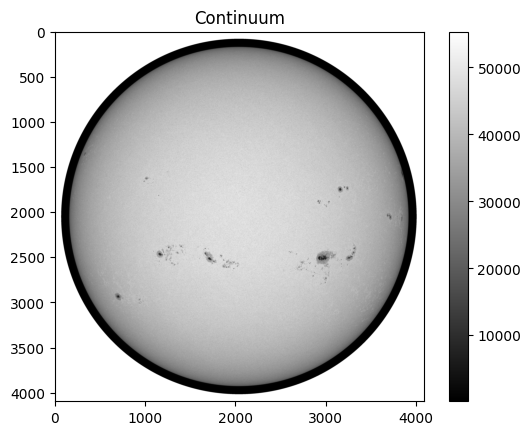

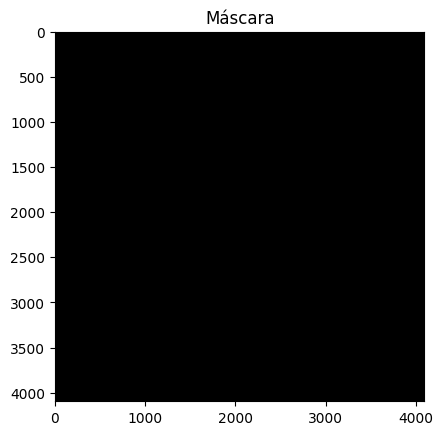

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(cont_map.data, cmap='gray')
plt.title('Continuum')
plt.colorbar()
plt.show()

plt.imshow(mascara, cmap='gray')
plt.title('Máscara')
plt.show()


In [ ]:
# Suponiendo cont_map es válido
umbral = 0.5 * np.nanmax(cont_map.data)  # Ajusta 0.5 a un valor que funcione
mascara = cont_map.data < umbral
print(f"✔️ Píxeles en la máscara: {np.sum(mascara)}")


✔️ Píxeles en la máscara: 1829997


In [ ]:
# Suponiendo mag_map es válido y tiene misma forma
campo = mag_map.data[mascara]

# Evitar errores si la máscara está vacía
if campo.size == 0:
    print("⚠️ Ningún valor dentro de la mancha, salta este archivo")
else:
    print(f"Campo magnético - Prom: {np.nanmean(campo):.2f}, Max: {np.nanmax(campo):.2f}, Min: {np.nanmin(campo):.2f}")


Campo magnético - Prom: -4.39, Max: 4961.10, Min: -4961.10


# Análisis Temporal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from sunpy.net import Fido, attrs as a
from sunpy.map import Map
from astropy.time import Time
from datetime import datetime, timedelta
import os

# Rango de fechas

start_date = '2024-08-08'
end_date   = '2024-08-12'
sample_interval = 6 * u.hour

# Parámetros de análisis
radio_pix = 250
threshold = 100
pixel_scale_arcsec = 0.6
rsun_arcsec = 964.8
dsun_km = 1.496e8

# 1. Buscar imágenes de intensidad y magnetogramas HMI
int_query = Fido.search(
    a.Time(start_date, end_date),
    a.Instrument('HMI'),
    a.Physobs('intensity'),
    a.Wavelength(6173 * u.Angstrom),
    a.Sample(sample_interval)
)
mag_query = Fido.search(
    a.Time(start_date, end_date),
    a.Instrument('HMI'),
    a.Physobs('LOS_magnetic_field'),
    a.Wavelength(6173 * u.Angstrom),
    a.Sample(sample_interval)
)

int_files = Fido.fetch(int_query)
mag_files = Fido.fetch(mag_query)

# Funciones auxiliares
def aplicar_mascara_disco_solar(my_map):
    ny, nx = my_map.data.shape
    x = np.arange(nx)
    y = np.arange(ny)
    X, Y = np.meshgrid(x, y)
    cx = my_map.reference_pixel.x.value
    cy = my_map.reference_pixel.y.value
    radius = my_map.rsun_obs.to('arcsec').value / my_map.scale.axis1.value
    r2 = (X - cx)**2 + (Y - cy)**2
    mask = r2 <= radius**2
    return np.where(mask, my_map.data, np.nan), mask

def encontrar_minimo(data):
    min_val = np.nanmin(data)
    idx = np.nanargmin(data)
    y, x = np.unravel_index(idx, data.shape)
    return min_val, (x, y)

def calcular_area_y_mascara(data, x, y, radio, threshold):
    ny, nx = data.shape
    X, Y = np.meshgrid(np.arange(nx), np.arange(ny))
    mask_circular = (X - x)**2 + (Y - y)**2 <= radio**2
    mask_area = (data > threshold) & mask_circular
    return np.sum(mask_area), mask_area

def calcular_area_real(mask_area, pixel_scale_arcsec, rsun_arcsec, dsun_km, cx=None, cy=None):
    ny, nx = mask_area.shape
    if cx is None: cx = nx / 2
    if cy is None: cy = ny / 2
    y, x = np.indices((ny, nx))
    r2 = (x - cx)**2 + (y - cy)**2
    R_pix = rsun_arcsec / pixel_scale_arcsec
    r_norm = r2 / R_pix**2
    with np.errstate(invalid='ignore'):
        mu = np.sqrt(1 - r_norm)
    mu = np.clip(mu, 0.01, 1.0)
    pixel_scale_rad = (pixel_scale_arcsec * u.arcsec).to(u.rad).value
    pixel_area_sr = pixel_scale_rad**2
    pixel_area_km2 = (dsun_km**2) * pixel_area_sr
    return np.nansum(mask_area * (pixel_area_km2 / mu)) * u.km**2

# Procesamiento
area_list = []
campo_magnetico_list = []
fechas = []

for i_file, m_file in zip(int_files, mag_files):
    try:
        i_map = Map(i_file)
        m_map = Map(m_file)

        i_data, _ = aplicar_mascara_disco_solar(i_map)
        min_val, (x_min, y_min) = encontrar_minimo(i_data)
        area_pix, mask_area = calcular_area_y_mascara(i_data, x_min, y_min, radio_pix, threshold)
        area_km2 = calcular_area_real(mask_area, pixel_scale_arcsec, rsun_arcsec, dsun_km)

        mag_data = m_map.data
        masked_field = np.where(mask_area, mag_data, np.nan)
        net_field = np.nansum(masked_field)

        fechas.append(Time(i_map.date).to_datetime())
        area_list.append(area_km2.to_value())
        campo_magnetico_list.append(net_field)

    except Exception as e:
        print(f"Error procesando archivos: {e}")
        continue

# Gráfica del área
plt.figure(figsize=(8, 4))
plt.plot(fechas, area_list, marker='o', linestyle='-', color='blue')
plt.title("Área proyectada de la mancha solar")
plt.xlabel("Fecha")
plt.ylabel("Área (km²)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfica del campo magnético neto
plt.figure(figsize=(8, 4))
plt.plot(fechas, campo_magnetico_list, marker='s', linestyle='-', color='red')
plt.title("Campo magnético neto de la mancha solar")
plt.xlabel("Fecha")
plt.ylabel("Suma de campo LOS (Gauss·px)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
